<center>

# EDA - LOS ANGELES CRIME

</center>

## Import libraries

In [189]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

## Import data

In [190]:
total_data = pd.read_csv("../data/interim/eda_data.csv")

## Exploration and data cleaning

In [191]:
total_data.head(5)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [192]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


-Before the descriptive analysis, there are a total of 433.936 rows.

-Some of the variables have null values: mocodes, vict_sex, vict_descent and weapon_desc.

-The data has: 4 numerical characteristics, 9 categorical characteristics and 2 datetime characteristics (which need to be converted to datetime format).

In [193]:
total_data.describe()

,time_occ,rpt_dist_no,vict_age,lat,lon
count,433936.000000,433936.000000,433936.000000,433936.000000,433936.000000
mean,1342.261801,807.326440,29.243091,33.978735,-118.063061
std,653.305824,582.410313,21.737410,1.613498,5.594830
min,1.000000,101.000000,0.000000,0.000000,-118.667600
25%,900.000000,327.000000,0.000000,34.023400,-118.376600
50%,1427.000000,644.000000,30.000000,34.051200,-118.296000
75%,1900.000000,1203.000000,44.000000,34.098100,-118.260900
max,2359.000000,2198.000000,99.000000,34.328900,0.000000


In [194]:
# Convert date_occ to datetime
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"]).dt.date
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

In [195]:
total_data.columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon'],
      dtype='object')

## Analysis of univariate variables

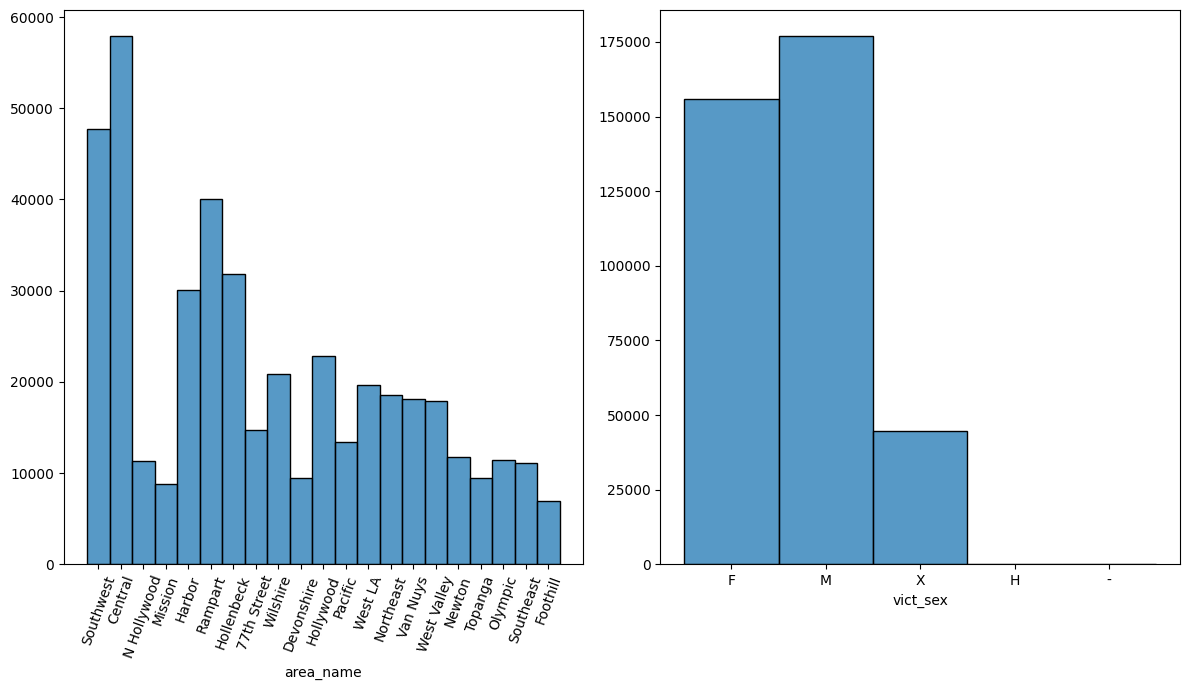

In [196]:
fig, axis = plt.subplots(1, 2, figsize=(12, 7))

# Create a multiple histogram
sns.histplot(ax=axis[0], data=total_data, x="area_name").set(ylabel=None) 
axis[0].tick_params(axis='x', rotation=70)

sns.histplot(ax=axis[1], data=total_data, x="vict_sex").set(ylabel=None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In these graphs, we can observe the following:

1) The area with the highest number of crime cases is Central, followed by Southwest, with an approximate difference of 10 thousand cases.

2) The gender of the victim with the most crime cases is male; however, there are several cases where the gender of the victim is unidentified.

3) There are values in the victim's gender that need to be addressed, such as 'H' and '-', which we consider as errors during the generation of crime reports.

In [197]:
# Calculate the number of null values in vict_sex
total_data["vict_sex"].isnull().sum()

56472

In [198]:
# Calculate the number of values in vict_sex
total_data["vict_sex"].value_counts()

vict_sex
M    176863
F    155883
X     44679
H        38
-         1
Name: count, dtype: int64

In [199]:
# Remove unusual values from vict_sex
total_data = total_data[total_data["vict_sex"].isin(["M", "F", "X"]) | total_data["vict_sex"].isnull()]
total_data["vict_sex"].value_counts()

vict_sex
M    176863
F    155883
X     44679
Name: count, dtype: int64

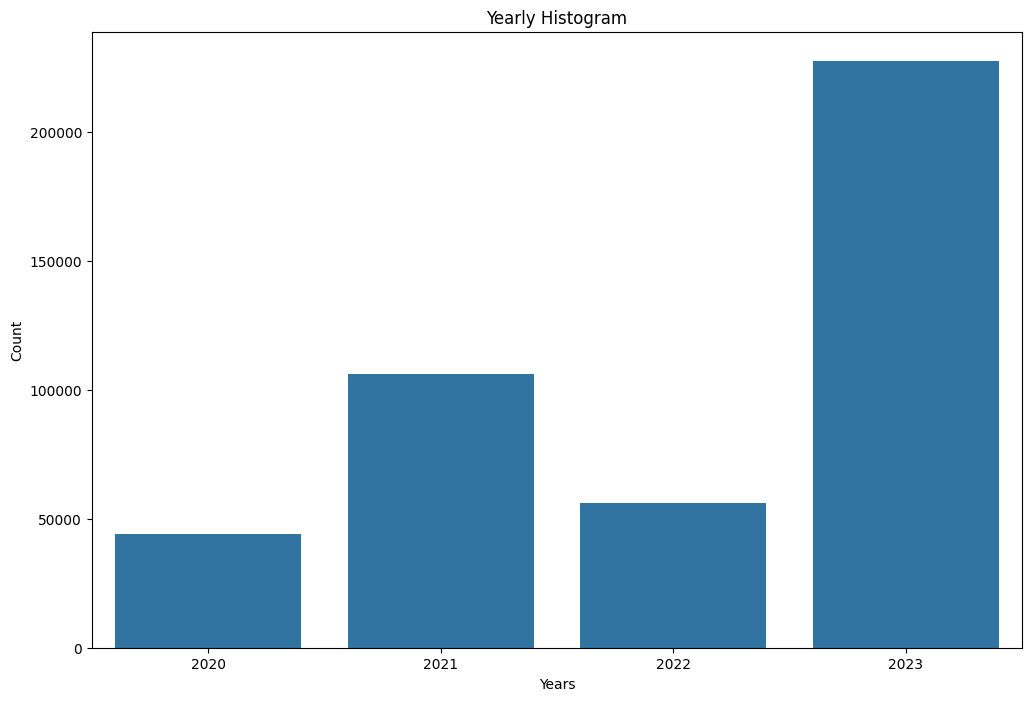

In [200]:
plt.figure(figsize=(12, 8))

# Create the histogram using Seaborn
ax = sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configure labels and title
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Yearly Histogram")

# Show the plot
plt.show()

In this graph, we can observe the crime levels per year, noting a high level of crime in 2023 compared to the three previous years.

In [201]:
# Get the frequency count of top 20 crimes 
delitos=total_data.value_counts("crm_cd_desc")[0:20]
delitos=pd.DataFrame(delitos)
delitos.head()

,count
crm_cd_desc,
VEHICLE - STOLEN,45699
BATTERY - SIMPLE ASSAULT,37054
BURGLARY FROM VEHICLE,28201
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27128
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25645


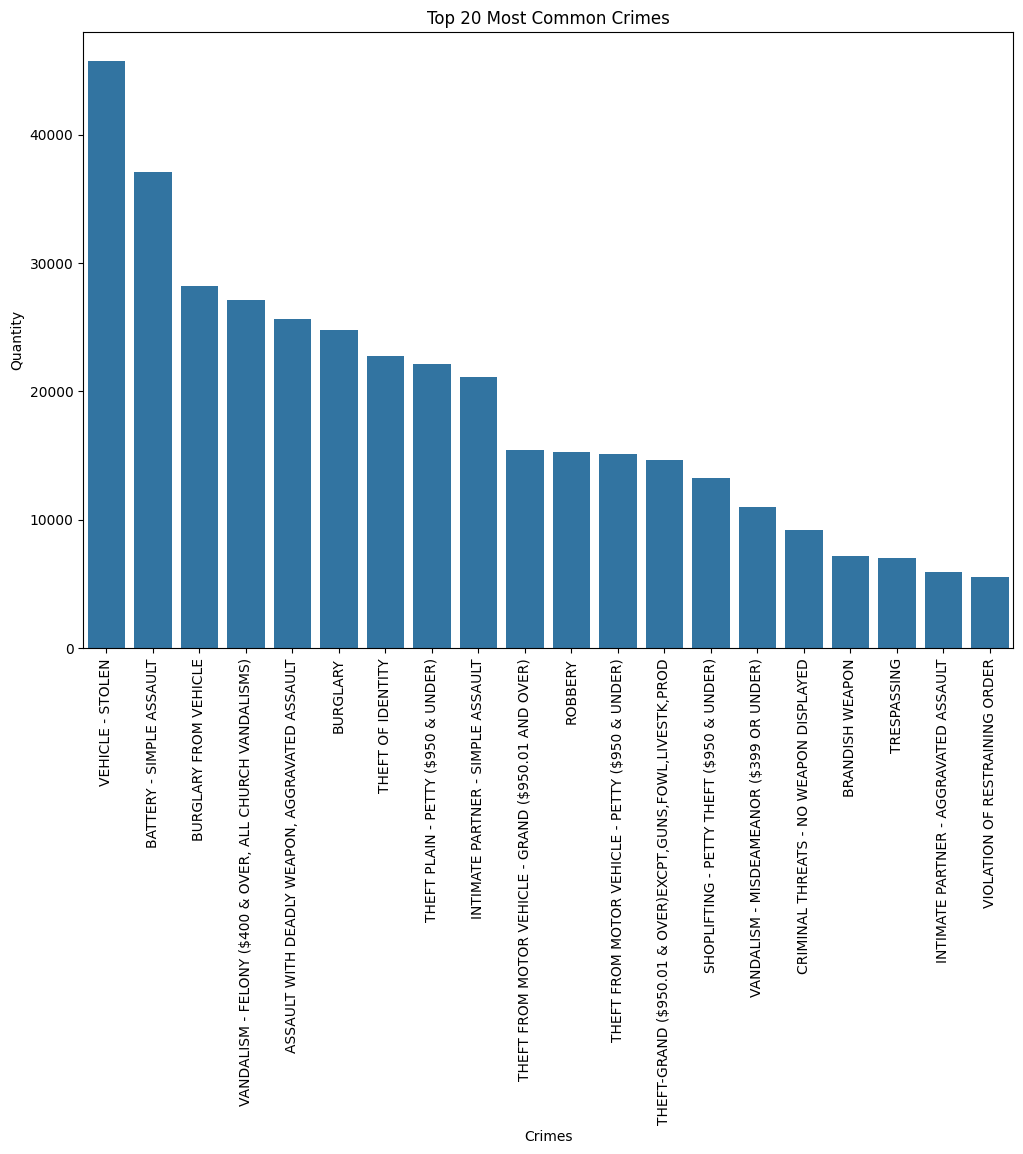

In [202]:
plt.figure(figsize=(12, 8))

# Create the histogram using Seaborn
ax = sns.barplot(x=delitos.index, y=delitos["count"], data=delitos)

# Configure labels and title
plt.tick_params(axis="x", labelrotation=90)
plt.xlabel("Crimes")
plt.ylabel("Quantity")
plt.title("Top 20 Most Common Crimes")

# Show the plot
plt.show()

In this graph, we observe the top 20 most recurrent crimes, confirming the mode: vehicle-stolen followed by battery-simple assault and burglary from vehicle

In [203]:
# Convert the 'time_occ' column to time type
hours= pd.to_datetime(total_data["time_occ"].astype(str), format="%H%M", errors="coerce").dt.time

# Get the frequency count of the top 20 occurrence times
hours = hours.value_counts("time_occ")[0:20]
hours=pd.DataFrame(hours)

# Sort the DataFrame by the time index
hours=hours.sort_index()
hours.head()

,proportion
time_occ,
03:00:00,0.015008
08:00:00,0.015612
09:00:00,0.013964
10:00:00,0.028322
11:00:00,0.015746


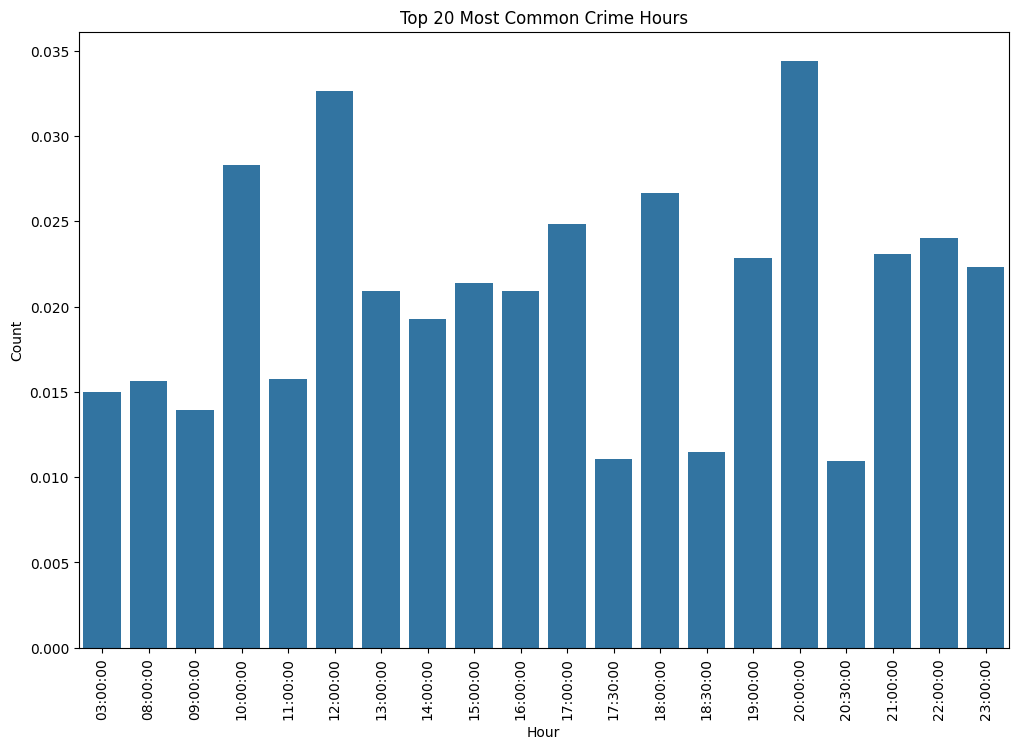

In [204]:
plt.figure(figsize=(12, 8))

# Create the histogram using Seaborn
ax = sns.barplot(x=hours.index, y=hours["proportion"], data=hours)

# Configure labels and title
plt.tick_params(axis="x", labelrotation=90)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Top 20 Most Common Crime Hours")

# Show the plot
plt.show()

In this graph, we observe the most recurrent crime hours, notably at 20:00, 12:00, and 10:00.

In [205]:
# Get the frequency count of the top 20 values in the "rpt_dist_no" column
rpt_codes=total_data.value_counts("rpt_dist_no")[0:20]
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes.head()

,count
rpt_dist_no,
162,4553
182,4015
111,3294
152,2607
153,2528


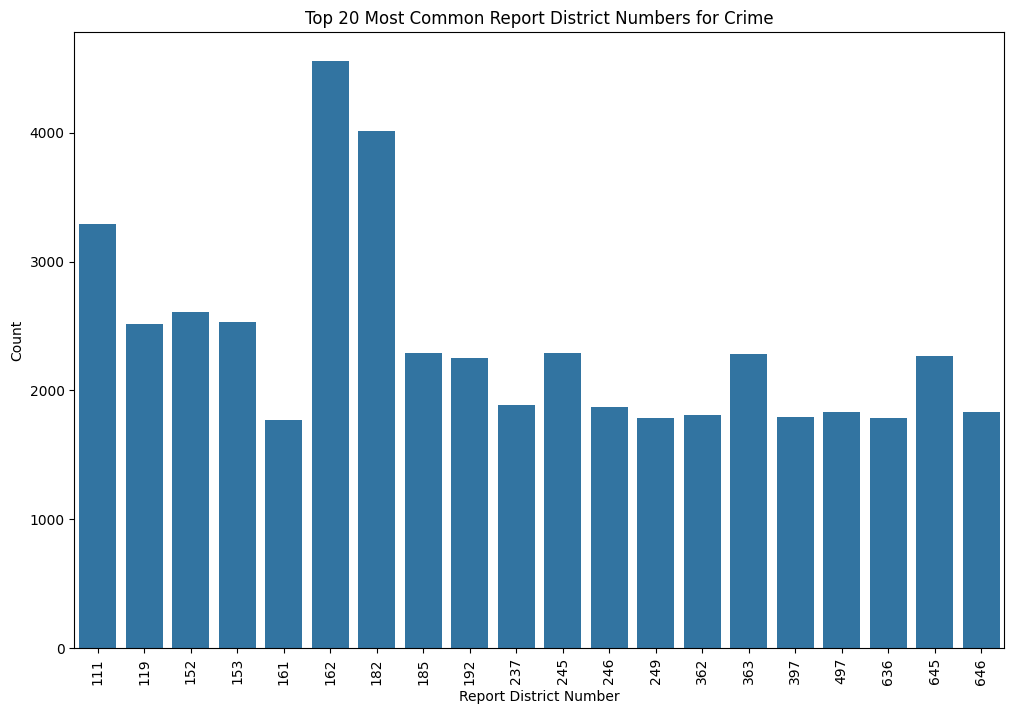

In [206]:
plt.figure(figsize=(12, 8))

# Create the histogram using Seaborn
ax = sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)

# Configure labels and title
plt.tick_params(axis="x", labelrotation=90)
plt.xlabel("Report District Number")
plt.ylabel("Count")
plt.title("Top 20 Most Common Report District Numbers for Crime")

# Show the plot
plt.show()

In this graph, we observe the most recurrent Report District Numbers, notably at 162, 182, and 111.

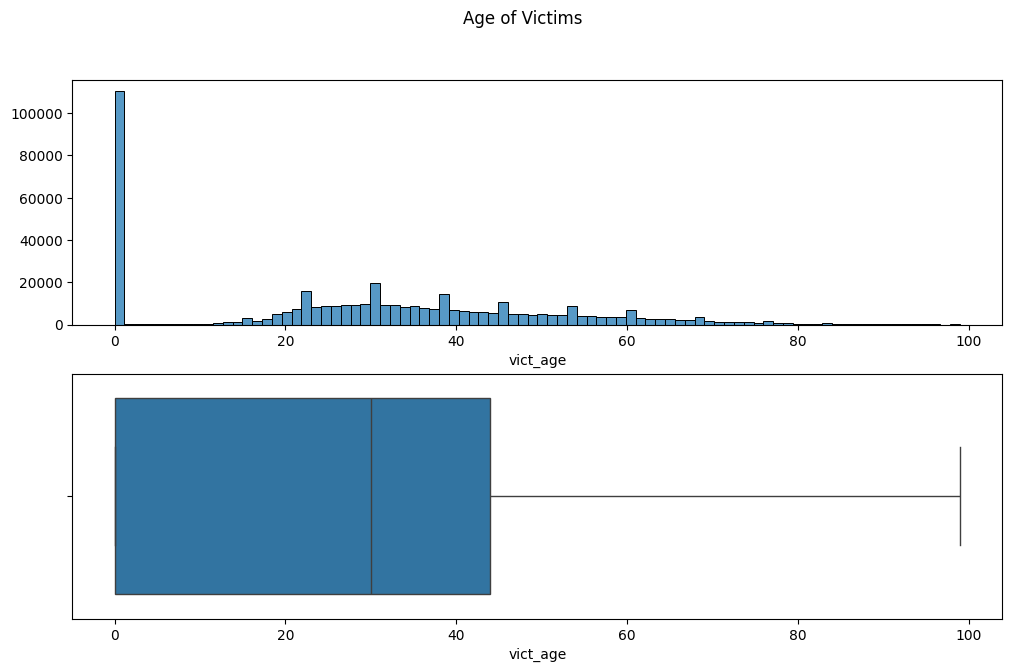

In [207]:
fig, axis = plt.subplots(2, 1, figsize=(12, 7))

# Create a multiple histogram
sns.histplot(ax=axis[0], data=total_data, x="vict_age").set(ylabel=None) 
sns.boxplot(ax=axis[1], data=total_data, x="vict_age")

# Configure title
fig.suptitle("Age of Victims")

# Show the plot
plt.show()

In this graph, we can observe the distribution of victim ages concerning the crimes that occurred. However, it is notable that there is a quantity of data where the victim's age is 0, which should be treated as an error.

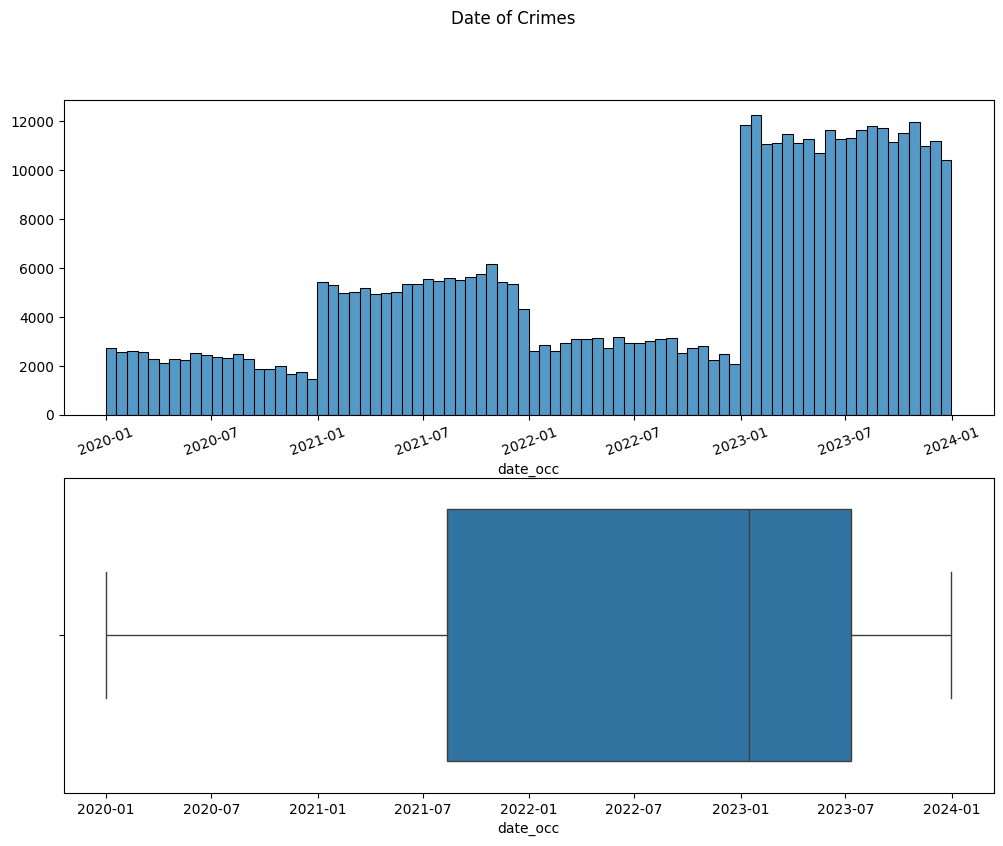

In [208]:
fig, axis = plt.subplots(2,1, figsize = (12, 9))

# Create a multiple histogram
sns.histplot(ax = axis[0], data = total_data, x = "date_occ").set(ylabel = None) 
axis[0].tick_params(axis="x", rotation=20)
sns.boxplot(ax = axis[1], data = total_data, x = "date_occ")#.set(xlabel = None)

# Configure title
fig.suptitle("Date of Crimes")

# Show the plot
plt.show()


In this graph, we can observe the crime levels per year, noting a high level of crime in 2023 compared to the three previous years.

In [209]:
# Get the frequency count of values in the "vict_descent" column
descent=total_data.value_counts("vict_descent")
descent=pd.DataFrame(descent)
descent

,count
vict_descent,
H,134284
W,82134
B,62354
X,48055
O,32125
A,9792
K,2214
C,2175
F,1912


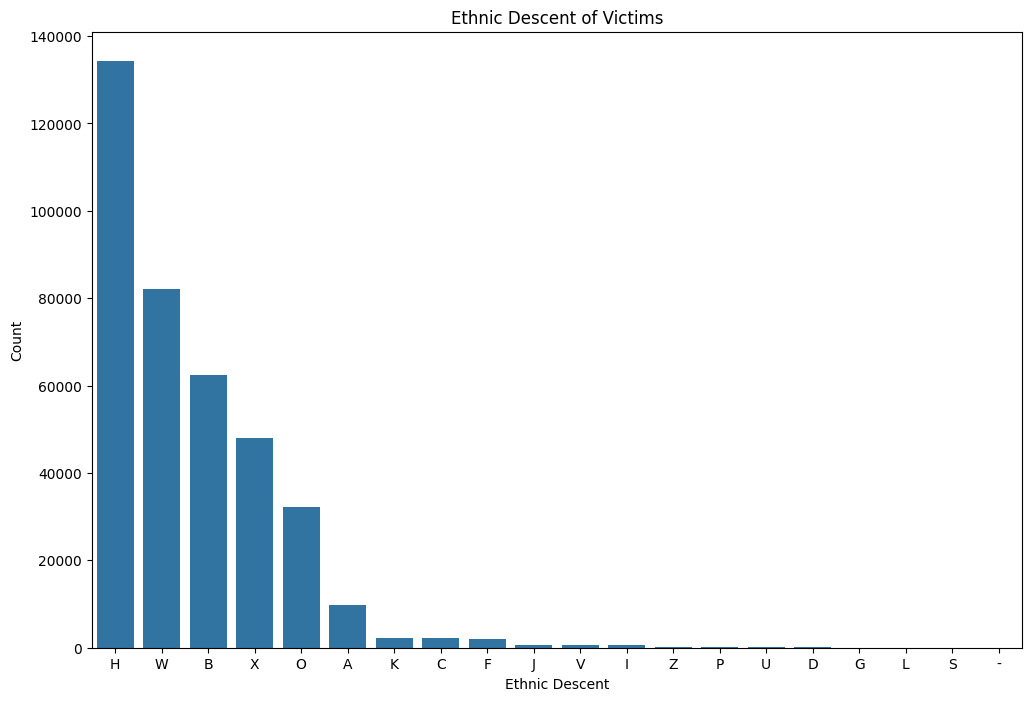

In [210]:
plt.figure(figsize=(12, 8))

# Create the histogram using Seaborn
ax = sns.barplot(x=descent.index, y=descent["count"], data=descent)

# Configure labels and title
plt.xlabel("Ethnic Descent")
plt.ylabel("Count")
plt.title("Ethnic Descent of Victims")

# Show the plot
plt.show()

In this graph, we observe that the most recurrent ethnic descent among victims is Hispanic/Latin/Mexican, followed by white individuals, with an approximate difference of 50,000 cases.

In [211]:
# Count the number of null values in the "vict_descent" column
total_data["vict_descent"].isnull().sum()

56475

In [212]:
total_data["vict_descent"].unique()

array(['B', 'H', 'X', 'W', 'A', 'O', nan, 'C', 'F', 'K', 'I', 'V', 'J',
       'S', 'D', 'Z', 'U', 'P', 'G', 'L', '-'], dtype=object)

In [213]:
# Remove unusual values from vict_descent
total_data = total_data[total_data["vict_descent"].isin(total_data["vict_descent"].unique()[:-1]) | total_data["vict_descent"].isnull()]
total_data["vict_descent"].value_counts()

vict_descent
H    134284
W     82134
B     62354
X     48055
O     32125
A      9792
K      2214
C      2175
F      1912
J       690
V       564
I       515
Z       248
P       133
U        82
D        54
G        34
L        33
S        23
Name: count, dtype: int64

In [214]:
# Get the frequency count of the top 20 values in the "weapon_desc" column
weapon_desc=total_data.value_counts("weapon_desc")[0:20]
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc.head()

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82486
UNKNOWN WEAPON/OTHER WEAPON,17572
VERBAL THREAT,11286
HAND GUN,9745
KNIFE WITH BLADE 6INCHES OR LESS,3371


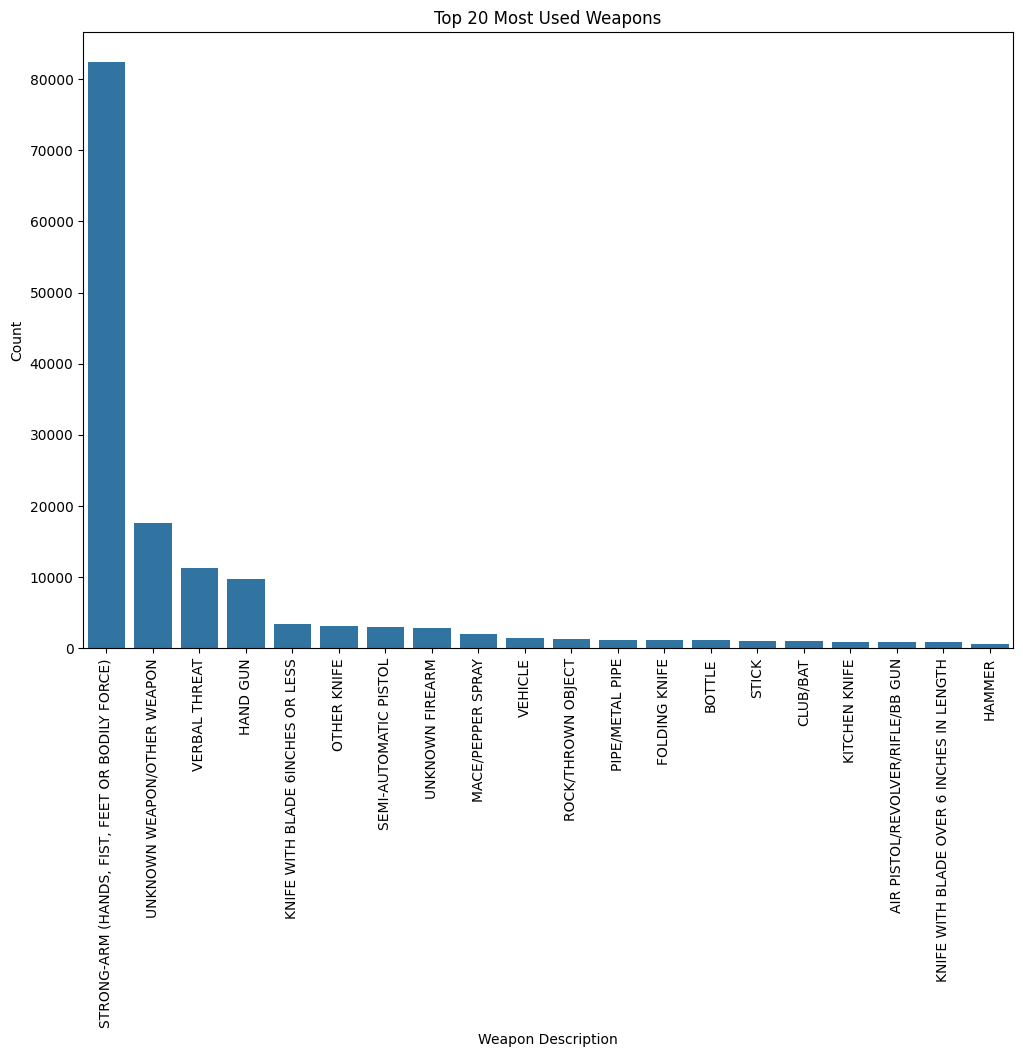

In [215]:
plt.figure(figsize=(12, 8))

# Create the histogram using Seaborn
ax = sns.barplot(x=weapon_desc.index, y=weapon_desc["count"], data=weapon_desc)
plt.tick_params(axis="x", labelrotation=90)

# Configure labels and title
plt.xlabel("Weapon Description")
plt.ylabel("Count")
plt.title("Top 20 Most Used Weapons")

# Show the plot
plt.show()

In this graph, we observe that the most recurrent weapon used is strong-arm (hands, fist, feet or bodily force)

In [216]:
# Count how many crimes have weapons
is_weapon=total_data["weapon_desc"].isnull().value_counts()
is_weapon

weapon_desc
True     279036
False    154860
Name: count, dtype: int64

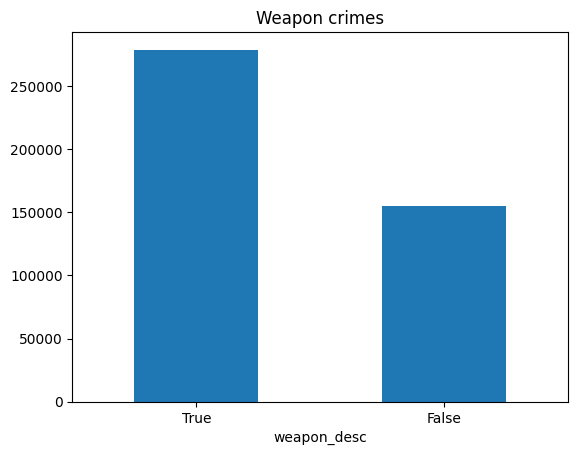

In [217]:
# Create plot of weapons count
is_weapon.plot(kind='bar',rot=0, title='Weapon crimes')

# Show the plot
plt.show()

In this graph, it can be observed that in the majority of crimes, some type of weapon was used, with an approximate difference of 120,000 crimes.

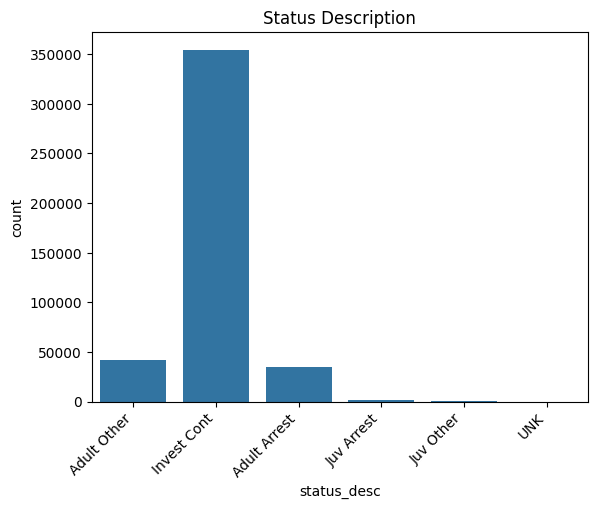

In [218]:
# Create a count plot to visualize the distribution of "status_desc"
sns.countplot(x="status_desc", data=total_data)
plt.xticks(rotation=45, ha="right")

# Set the title for the plot
plt.title("Status Description")

# Show the plot
plt.show()

In this graph, we can observe that the majority of crimes are still under open investigation.

In [219]:
# Get the frequency count of the top 50 values in the "location" column
location = total_data.value_counts("location")[0:50]
location = pd.DataFrame(location)
location.head()

,count
location,
800 N ALAMEDA ST,1623
7TH,1247
6TH ST,1228
7TH ST,1178
6TH,1175


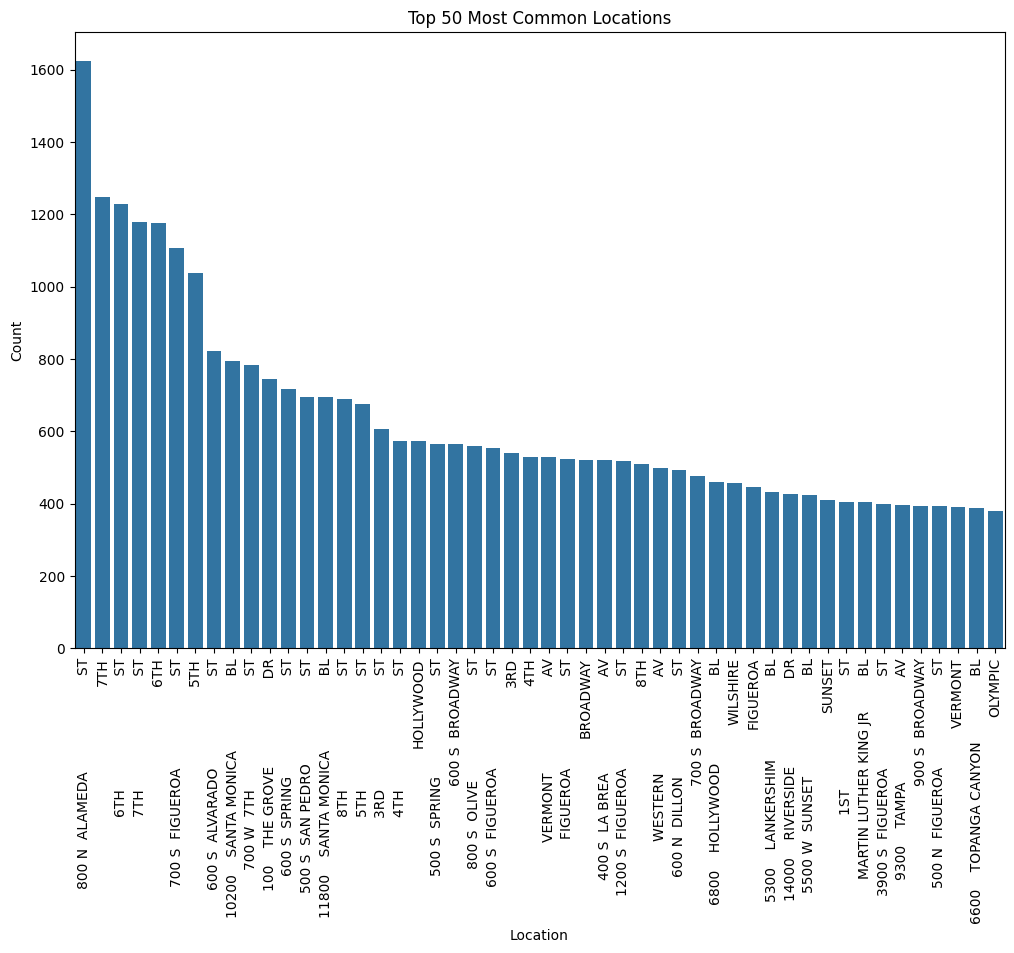

In [220]:
plt.figure(figsize=(12, 8))

# Create the barplot using Seaborn
ax = sns.barplot(x=location.index, y=location["count"], data=location)
plt.tick_params(axis="x", labelrotation=90)

# Configure labels and title
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Top 50 Most Common Locations")

# Show the plot
plt.show()

In this graph, we observe the top 50 most recurrent location crimes, confirming the mode: 800 N Alameda followed by 7TH and 6TH ST

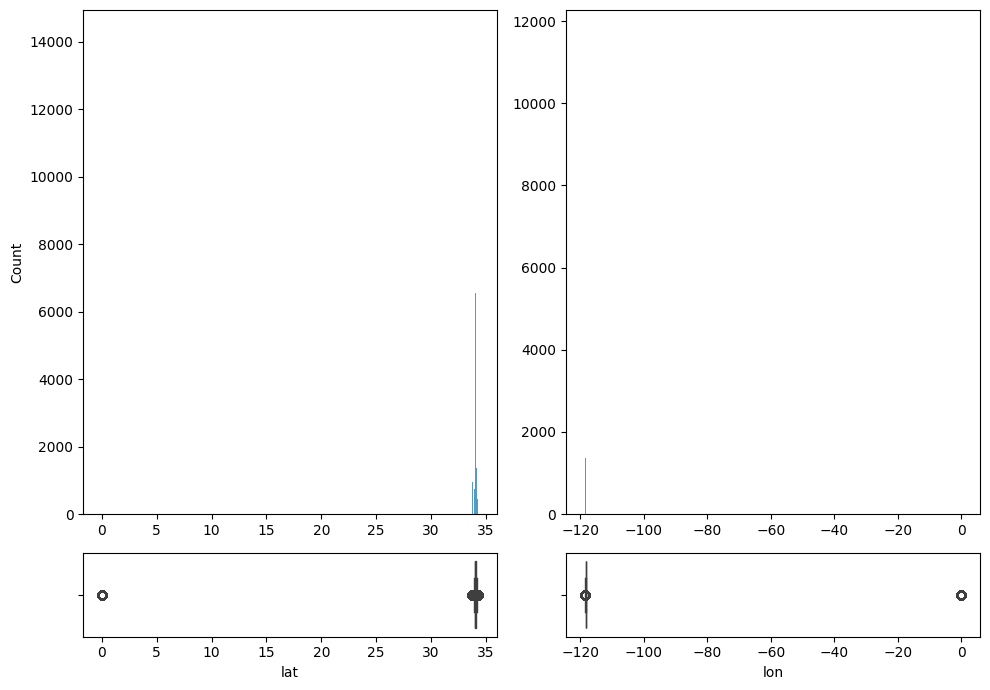

In [221]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={"height_ratios": [6, 1]})

# Create a multiple subplot with histograms and boxplots for latitude
sns.histplot(ax=axis[0, 0], data=total_data, x="lat").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=total_data, x="lat")

# Create a multiple subplot with histograms and boxplots for longitude
sns.histplot(ax=axis[0, 1], data=total_data, x="lon").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=total_data, x="lon")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In these graphs, we can observe values at 0, which may represent errors and need to be addressed.

In [222]:
# Check the number of instances where Lat is equal to 0
len(total_data.loc[total_data["lat"] == 0])

972

In [223]:
# Check the number of instances where Lat and lon are equals to 0
len(total_data.loc[(total_data["lat"] == 0) & (total_data["lon"] == 0)])

972

In [224]:
# Remove lat and lon 0
total_data.drop(total_data.loc[(total_data["lat"] == 0) & (total_data["lon"] == 0)].index, axis=0, inplace= True)

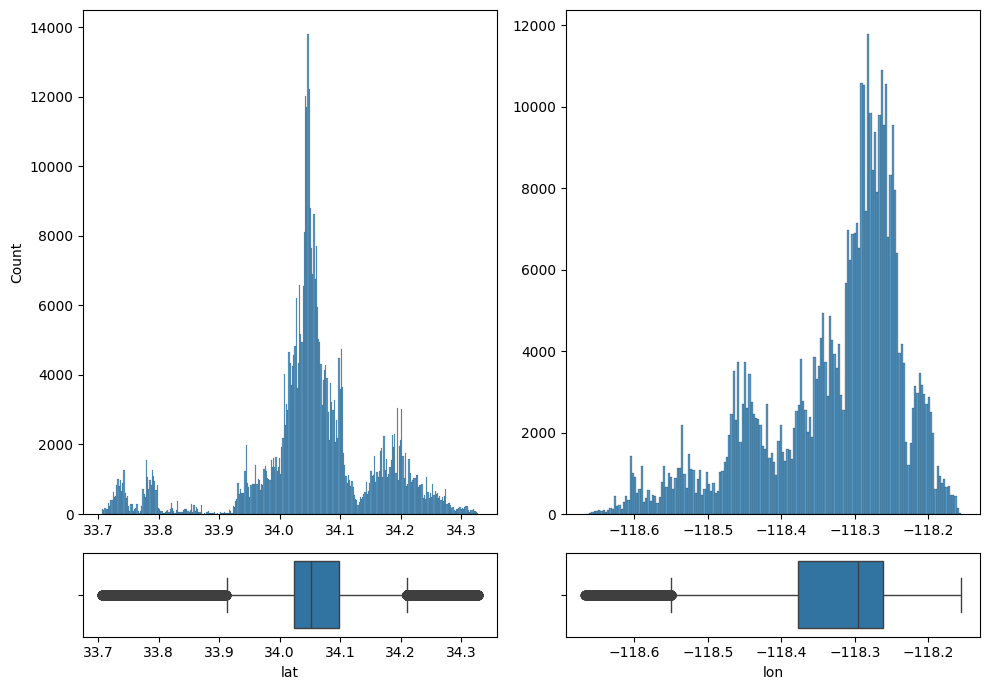

In [225]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Create a multiple figure with histograms and box plots
sns.histplot(ax=axis[0, 0], data=total_data, x="lat").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=total_data, x="lat")
sns.histplot(ax=axis[0, 1], data=total_data, x="lon").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=total_data, x="lon")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In these plots, we observe a better distribution of latitude and longitude after removing previous errors.

The majority of crimes seem to occur within the latitude range of 34.0 to 34.1 and the longitude range of -118.4 to -118.2

In [226]:
# Splitting the "mocodes" column values by space
total_data['mocodes']=total_data['mocodes'].str.split(" ")

In [227]:
# Get the frequencies of each code in "mocodes"
frecuencias = total_data['mocodes'].apply(pd.Series).stack().value_counts()
frecuencias=frecuencias[0:20]

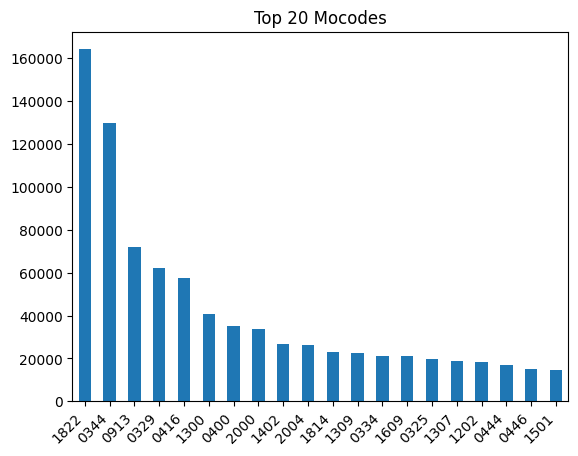

In [228]:
# Create a frecuencies plot to visualize the diferents "mocodes"
frecuencias.plot(kind='bar',rot=0, title='Top 20 Mocodes')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [229]:
len(total_data[total_data["mocodes"].isna()])

59047

In [230]:
total_data.dropna(subset = "mocodes", axis = 0, inplace= True, ignore_index= True)

In [231]:
# Extracting weekday and month information from the "date_occ" column
total_data["weekday"] = total_data["date_occ"].apply(lambda x:x.strftime("%A"))
total_data["month"] = total_data["date_occ"].apply(lambda x:x.strftime("%B"))

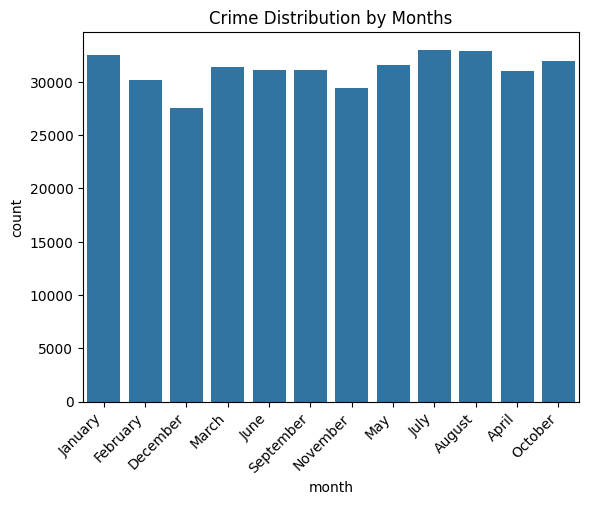

In [232]:
# Create a count plot to visualize the distribution of crimes across months
sns.countplot(x="month", data=total_data)
plt.xticks(rotation=45, ha="right")

# Configure title
plt.title("Crime Distribution by Months")

# Show the plot
plt.show()

In this graph, we can observe that the months with the highest crime rates are January, July, and August.

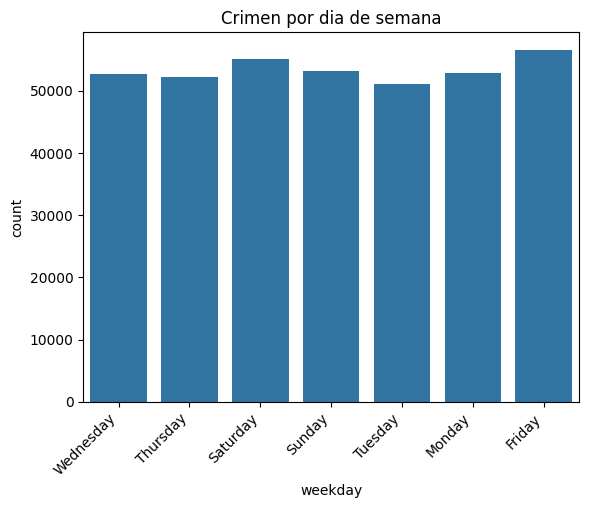

In [233]:
# Create a count plot to visualize the distribution of crimes across months
sns.countplot(x="weekday", data=total_data)
plt.xticks(rotation=45, ha='right')

# Configure title
plt.title('Crimen por dia de semana')

# Show the plot
plt.show()

In this graph, we can observe that a nearly consistent number of crimes occur throughout the week; however, Fridays stand out as the weekday with the highest crime occurrence.

## Analysis of multivariate variables

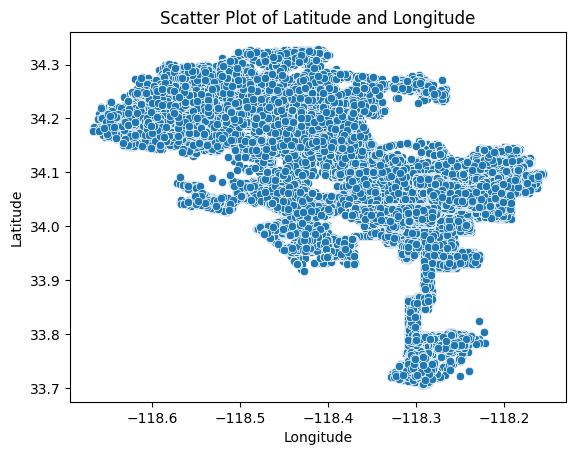

In [234]:
# Create a scatter plot to visualize the geographical distribution of data points
sns.scatterplot(x=total_data["lon"], y=total_data["lat"], data=total_data)

# Configure labels and title
plt.title("Scatter Plot of Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

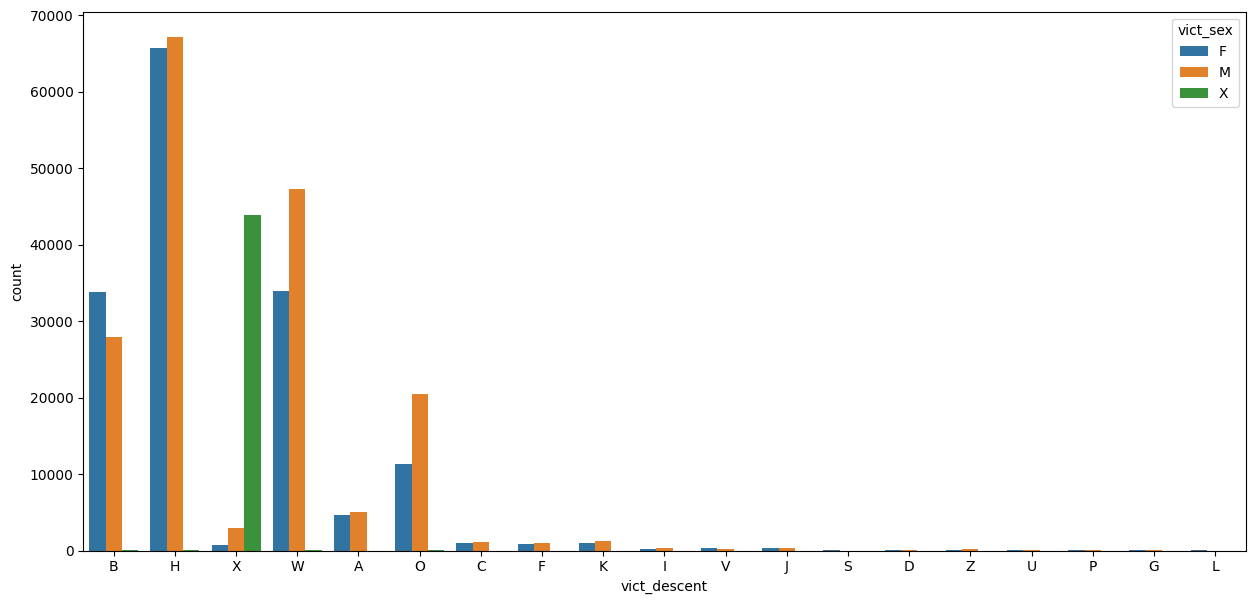

In [235]:
plt.figure(figsize=(15, 7))

# Create a multiple scatter diagram
sns.countplot(data = total_data, x ="vict_descent" , hue = "vict_sex")

# Show the plot
plt.show()

In this graph, we can observe that among various ethnicities, males tend to be the primary victims of crimes, except in the Black ethnicity where the majority of crimes are experienced by females.

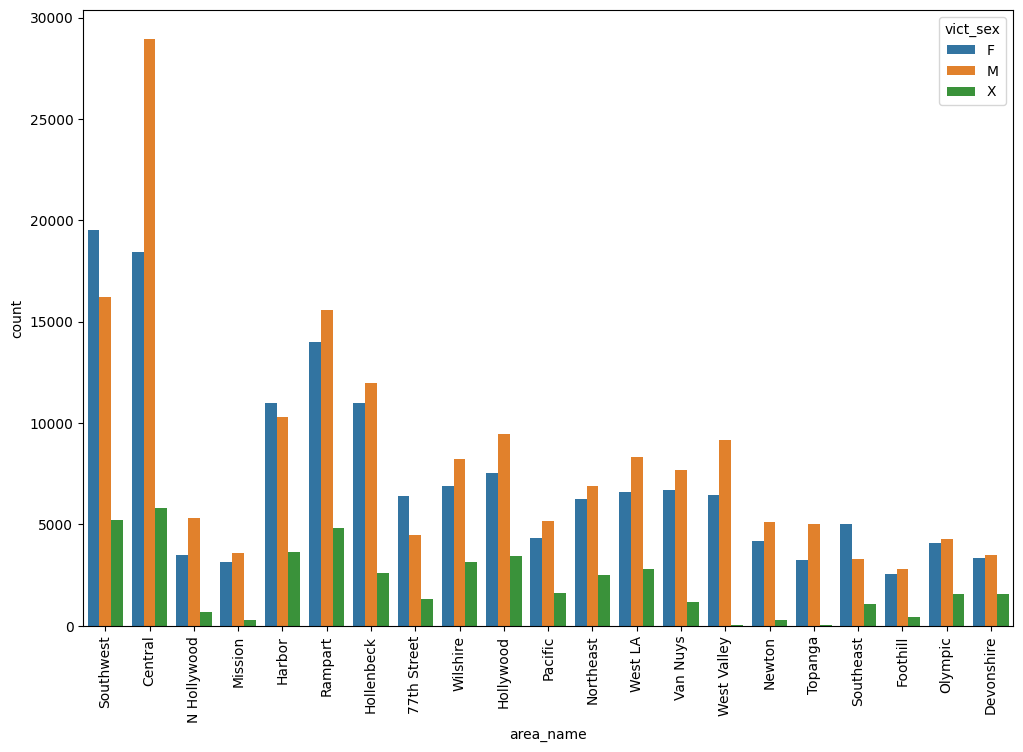

In [236]:
plt.figure(figsize=(12, 8))

# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_sex")
plt.tick_params(axis = "x", labelrotation=90)

# Show the plot
plt.show()

In this graph, we can discern that in the region with the highest crime rate, males bear the brunt of criminal incidents. Conversely, in the Southwest, which holds the second-highest position in crime rates, it is the females who experience a higher incidence of criminal incidents.

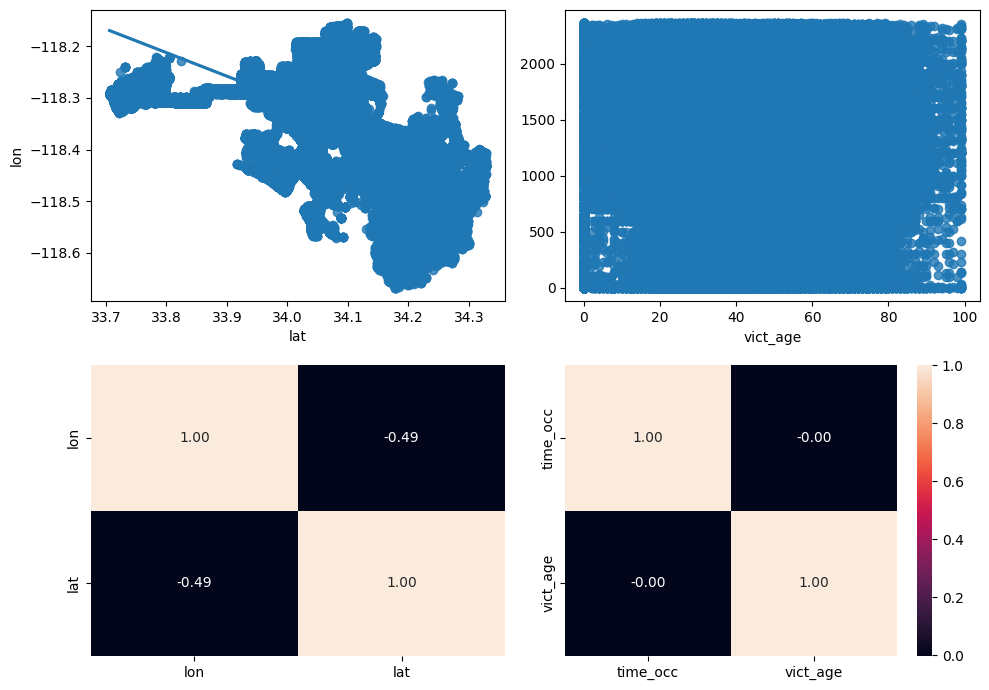

In [237]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a multiple scatter plot
sns.regplot(ax=axis[0, 0], data=total_data, x="lat", y="lon")
sns.heatmap(total_data[["lon", "lat"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=total_data, x="vict_age", y="time_occ").set(ylabel=None)
sns.heatmap(total_data[["time_occ", "vict_age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In these graphics, we can observe:

1)  A somewhat strong indirect correlation between longitude and latitude.

2)  Between age and time, we can verify that there is no correlation.

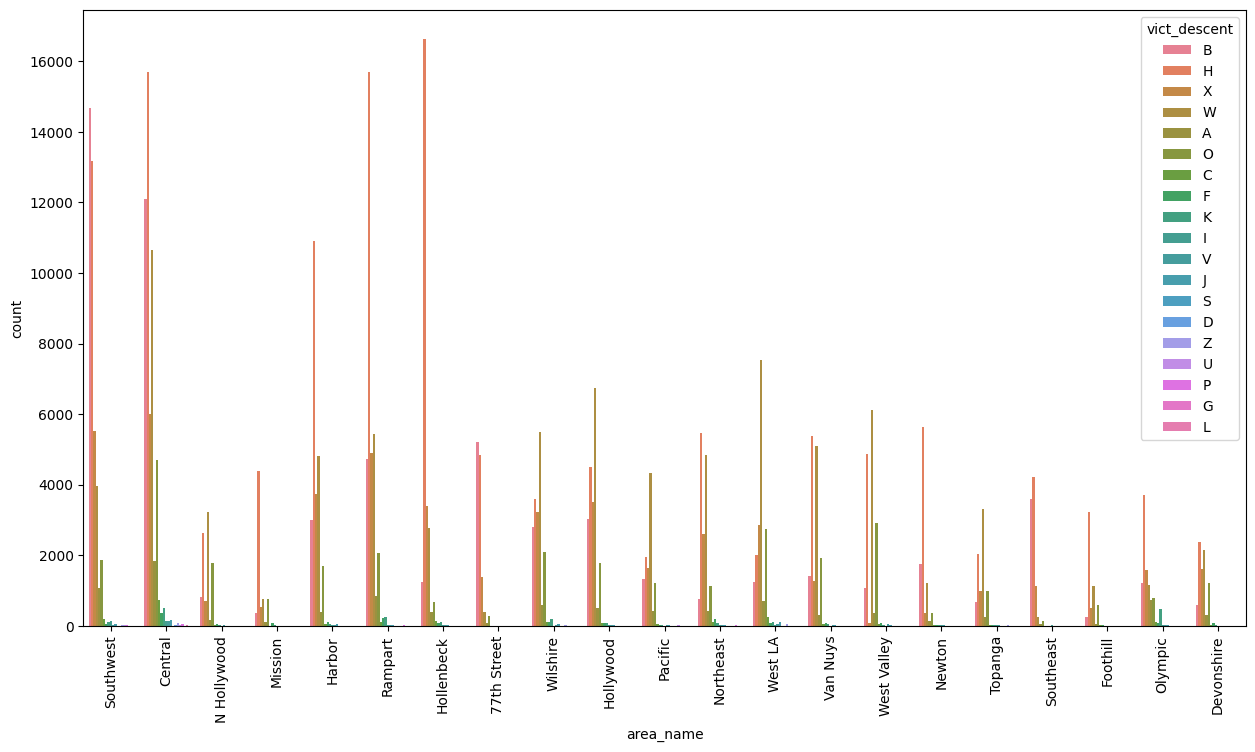

In [238]:
plt.figure(figsize=(15, 8))

# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_descent")
plt.tick_params(axis = "x", labelrotation=90)

# Show the plot
plt.show()


In this graph, we can observe the prevalent ethnicities facing the highest crime rates in each area, with Hispanic/Latin/Mexican and Black being the most recurrent.

## Feature engineering

In [239]:
# Replace nulls of "weapon_desc" column by "No weapon register"
total_data["weapon_desc"].fillna("No weapon register", inplace = True)
total_data["weapon_desc"] 

0         STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1                            UNKNOWN WEAPON/OTHER WEAPON
2                                     No weapon register
3                                     No weapon register
4                                     No weapon register
                               ...                      
373872                                No weapon register
373873                                No weapon register
373874    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
373875                                No weapon register
373876                                No weapon register
Name: weapon_desc, Length: 373877, dtype: object

In [240]:
total_data = total_data.reset_index(drop=True)

In [241]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373877 entries, 0 to 373876
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      373877 non-null  datetime64[ns]
 1   time_occ      373877 non-null  int64         
 2   area_name     373877 non-null  object        
 3   rpt_dist_no   373877 non-null  int64         
 4   crm_cd_desc   373877 non-null  object        
 5   mocodes       373877 non-null  object        
 6   vict_age      373877 non-null  int64         
 7   vict_sex      373757 non-null  object        
 8   vict_descent  373757 non-null  object        
 9   premis_desc   373597 non-null  object        
 10  weapon_desc   373877 non-null  object        
 11  status_desc   373877 non-null  object        
 12  location      373877 non-null  object        
 13  lat           373877 non-null  float64       
 14  lon           373877 non-null  float64       
 15  weekday       373

In [242]:
# Replace nulls of "vict_sex" an "vict_descent" column by "X" (Unknown)
total_data["vict_sex"].fillna("X", inplace = True)
total_data["vict_descent"].fillna("X", inplace = True)

In [243]:
total_data.dropna(subset=["premis_desc"], inplace = True, ignore_index = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373597 entries, 0 to 373596
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      373597 non-null  datetime64[ns]
 1   time_occ      373597 non-null  int64         
 2   area_name     373597 non-null  object        
 3   rpt_dist_no   373597 non-null  int64         
 4   crm_cd_desc   373597 non-null  object        
 5   mocodes       373597 non-null  object        
 6   vict_age      373597 non-null  int64         
 7   vict_sex      373597 non-null  object        
 8   vict_descent  373597 non-null  object        
 9   premis_desc   373597 non-null  object        
 10  weapon_desc   373597 non-null  object        
 11  status_desc   373597 non-null  object        
 12  location      373597 non-null  object        
 13  lat           373597 non-null  float64       
 14  lon           373597 non-null  float64       
 15  weekday       373

In [244]:
total_data = total_data.loc[total_data["vict_age"] > 0]
total_data = total_data.reset_index()

In [245]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         320504 non-null  int64         
 1   date_occ      320504 non-null  datetime64[ns]
 2   time_occ      320504 non-null  int64         
 3   area_name     320504 non-null  object        
 4   rpt_dist_no   320504 non-null  int64         
 5   crm_cd_desc   320504 non-null  object        
 6   mocodes       320504 non-null  object        
 7   vict_age      320504 non-null  int64         
 8   vict_sex      320504 non-null  object        
 9   vict_descent  320504 non-null  object        
 10  premis_desc   320504 non-null  object        
 11  weapon_desc   320504 non-null  object        
 12  status_desc   320504 non-null  object        
 13  location      320504 non-null  object        
 14  lat           320504 non-null  float64       
 15  lon           320

In [246]:
codigos = pd.read_csv("../data/raw/mo_codes_data.csv")
codigos

,REV: 07/19
0,0100 Suspect Impersonate
1,0101 Aid victim
2,0102 Blind
3,0103 Physically disabled
4,0104 Customer
...,...
858,4025 T/C - South Traffic (STD)
859,4026 T/C - Valley Traffic (VTD)
860,4027 T/C - West Traffic (WTD)TRAFFIC COLLISION...
861,NUMERICAL


In [247]:
codigos["mocodes"] = codigos["REV: 07/19"].str[:4]
codigos["mocodes_desc"] = codigos["REV: 07/19"].str[4:]
codigos

,REV: 07/19,mocodes,mocodes_desc
0,0100 Suspect Impersonate,0100,Suspect Impersonate
1,0101 Aid victim,0101,Aid victim
2,0102 Blind,0102,Blind
3,0103 Physically disabled,0103,Physically disabled
4,0104 Customer,0104,Customer
...,...,...,...
858,4025 T/C - South Traffic (STD),4025,T/C - South Traffic (STD)
859,4026 T/C - Valley Traffic (VTD),4026,T/C - Valley Traffic (VTD)
860,4027 T/C - West Traffic (WTD)TRAFFIC COLLISION...,4027,T/C - West Traffic (WTD)TRAFFIC COLLISION (C...
861,NUMERICAL,NUME,RICAL


In [248]:
codigos.drop("REV: 07/19", axis = 1, inplace = True)
codigos.reset_index(drop=True, inplace=True)
codigos.head()

,mocodes,mocodes_desc
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer


In [249]:
codigos = codigos[~codigos['mocodes'].str.contains(r'[a-zA-Z- ]')]
codigos.head()

,mocodes,mocodes_desc
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer


In [250]:
codigos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 860
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mocodes       824 non-null    object
 1   mocodes_desc  824 non-null    object
dtypes: object(2)
memory usage: 19.3+ KB


In [251]:
total_data["mocodes_desc"]=total_data['mocodes']
total_data["mocodes_desc"].head()

0                [0444, 0913]
1          [0416, 1822, 1414]
2                [0329, 1402]
3                      [0329]
4    [0413, 1822, 1262, 1415]
Name: mocodes_desc, dtype: object

In [252]:
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(lambda x: sorted(x))
total_data["mocodes_desc"].head(5)

0                [0444, 0913]
1          [0416, 1414, 1822]
2                [0329, 1402]
3                      [0329]
4    [0413, 1262, 1415, 1822]
Name: mocodes_desc, dtype: object

In [253]:
total_data["mocodes_desc"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 320504 entries, 0 to 320503
Series name: mocodes_desc
Non-Null Count   Dtype 
--------------   ----- 
320504 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [254]:
codigos_dict = dict(zip(codigos["mocodes"], codigos["mocodes_desc"]))

for idx, code_list in enumerate(total_data["mocodes_desc"]):
    for i, code in enumerate(code_list):
        if code in codigos_dict:
            total_data.at[idx, "mocodes_desc"][i] = codigos_dict[code].lower()

total_data["mocodes_desc"].head()

0                      [ pushed,  victim knew suspect]
1        [ hit-hit w/ weapon,  photographs,  stranger]
2          [ vandalized,  evidence booked (any crime)]
3                                        [ vandalized]
4    [ drugged,  raped while unconscious,  rape kit...
Name: mocodes_desc, dtype: object

In [255]:
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(lambda x: "".join(x))
total_data["mocodes_desc"].head()

0                           pushed victim knew suspect
1               hit-hit w/ weapon photographs stranger
2               vandalized evidence booked (any crime)
3                                           vandalized
4     drugged raped while unconscious rape kit stra...
Name: mocodes_desc, dtype: object

In [256]:
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

# Applying a function to preprocess the text
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(preprocess_text)
total_data["mocodes_desc"].head()

0                      [pushed, victim, knew, suspect]
1            [hit, hit, weapon, photographs, stranger]
2           [vandalized, evidence, booked, any, crime]
3                                         [vandalized]
4    [drugged, raped, while, unconscious, rape, kit...
Name: mocodes_desc, dtype: object

In [257]:
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(lambda x: " ".join(x))
total_data["mocodes_desc"].head

<bound method NDFrame.head of 0                                pushed victim knew suspect
1                       hit hit weapon photographs stranger
2                      vandalized evidence booked any crime
3                                                vandalized
4         drugged raped while unconscious rape kit stranger
                                ...                        
320499    removes vict property vehicle involved breaks ...
320500      indecent exposure suspect is homeless transient
320501    grabbed victim knew suspect susp is was curren...
320502                       removes vict property stranger
320503    removes vict property suspect removed parts fr...
Name: mocodes_desc, Length: 320504, dtype: object>

In [258]:
len(total_data["mocodes_desc"].unique())

103841

In [259]:
total_data.drop("index", axis = 1, inplace = True)
total_data.head()

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,"[0444, 0913]",36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978,Wednesday,January,pushed victim knew suspect
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,"[0416, 1822, 1414]",25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,Wednesday,January,hit hit weapon photographs stranger
2,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),"[0329, 1402]",76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No weapon register,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,Wednesday,January,vandalized evidence booked any crime
3,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",[0329],31,X,X,BEAUTY SUPPLY STORE,No weapon register,Invest Cont,14400 TITUS ST,34.2198,-118.4468,Wednesday,January,vandalized
4,2020-01-01,30,Central,163,"RAPE, FORCIBLE","[0413, 1822, 1262, 1415]",25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY,34.0452,-118.2534,Wednesday,January,drugged raped while unconscious rape kit stranger


In [260]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320504 non-null  datetime64[ns]
 1   time_occ      320504 non-null  int64         
 2   area_name     320504 non-null  object        
 3   rpt_dist_no   320504 non-null  int64         
 4   crm_cd_desc   320504 non-null  object        
 5   mocodes       320504 non-null  object        
 6   vict_age      320504 non-null  int64         
 7   vict_sex      320504 non-null  object        
 8   vict_descent  320504 non-null  object        
 9   premis_desc   320504 non-null  object        
 10  weapon_desc   320504 non-null  object        
 11  status_desc   320504 non-null  object        
 12  location      320504 non-null  object        
 13  lat           320504 non-null  float64       
 14  lon           320504 non-null  float64       
 15  weekday       320

In [261]:
total_data.drop("mocodes", axis = 1, inplace = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320504 non-null  datetime64[ns]
 1   time_occ      320504 non-null  int64         
 2   area_name     320504 non-null  object        
 3   rpt_dist_no   320504 non-null  int64         
 4   crm_cd_desc   320504 non-null  object        
 5   vict_age      320504 non-null  int64         
 6   vict_sex      320504 non-null  object        
 7   vict_descent  320504 non-null  object        
 8   premis_desc   320504 non-null  object        
 9   weapon_desc   320504 non-null  object        
 10  status_desc   320504 non-null  object        
 11  location      320504 non-null  object        
 12  lat           320504 non-null  float64       
 13  lon           320504 non-null  float64       
 14  weekday       320504 non-null  object        
 15  month         320

In [262]:
str_columns=total_data.select_dtypes(include='object').columns
str_columns

Index(['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'weekday', 'month',
       'mocodes_desc'],
      dtype='object')

In [263]:
columnas_factorizadas = {i: dict(zip(total_data[i], pd.factorize(total_data[i])[0])) for i in str_columns}


In [264]:
resultados_json = pd.Series(columnas_factorizadas).to_json(indent=2)

with open('../data/interim/fact.json', 'w') as file:
    file.write(resultados_json)

In [265]:
for i in str_columns:
    total_data[i]=pd.factorize(total_data[i])[0]

In [266]:
total_data.head()

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,377,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,163,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1543,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,1998,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,163,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [267]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320504 non-null  datetime64[ns]
 1   time_occ      320504 non-null  int64         
 2   area_name     320504 non-null  int64         
 3   rpt_dist_no   320504 non-null  int64         
 4   crm_cd_desc   320504 non-null  int64         
 5   vict_age      320504 non-null  int64         
 6   vict_sex      320504 non-null  int64         
 7   vict_descent  320504 non-null  int64         
 8   premis_desc   320504 non-null  int64         
 9   weapon_desc   320504 non-null  int64         
 10  status_desc   320504 non-null  int64         
 11  location      320504 non-null  int64         
 12  lat           320504 non-null  float64       
 13  lon           320504 non-null  float64       
 14  weekday       320504 non-null  int64         
 15  month         320

## Correlation analysis

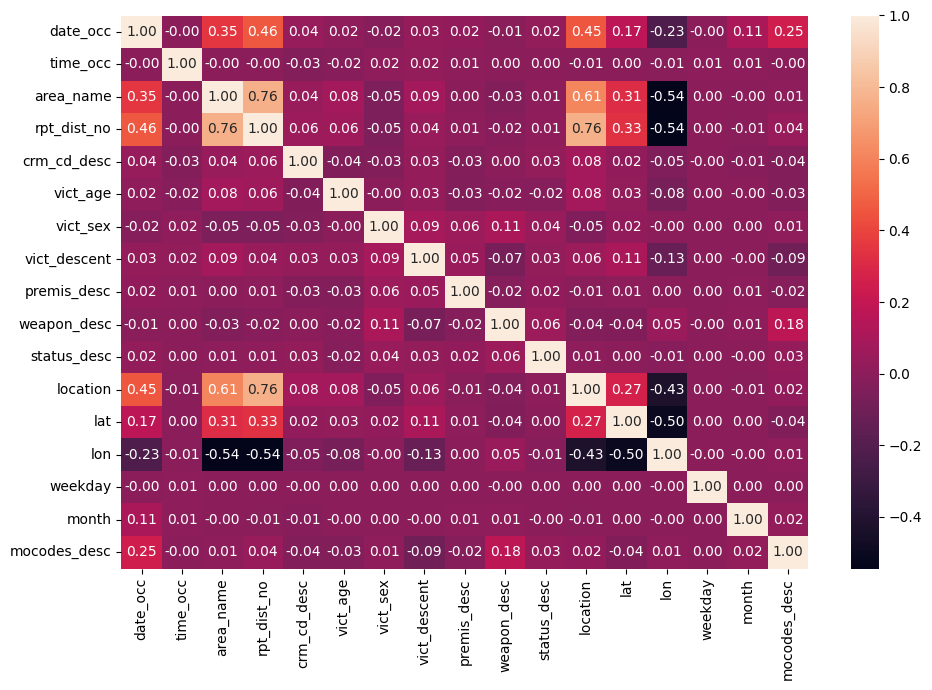

In [268]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In this correlation graph, we can observe:

1) A strong correlation between "rpt_dist_no," "Location," and "Area_Name," as well as a not-so-strong correlation with "date_occ," "lat," and "lon," which is understandable as it involves the report number per district. However, "rpt_dist_no" functions as an identifier without predictive utility, lacking correlation with significant variables such as "Vict_sex," "Vict_descent," "Vict_age," "Mocodes," among others.

2) A not-so-strong correlation between "date_occ" with the "area_name," "location," and a low correlation with "lat," "lon," and "mocodes."

3) Variables that we consider important, such as "Vict_sex," "Vict_descent," "Vict_age," "Mocodes," "crm_cd_desc," "status_desc," show no correlation, suggesting that the dataset may lack other crucial data that would assist in performing a better model.

In [269]:
total_data.drop("rpt_dist_no", axis = 1, inplace = True)


In [270]:
# Count duplicate rows
duplicate_count = total_data.duplicated().sum()
duplicate_count

67

In [271]:
# Remove duplicate rows
total_data.drop_duplicates(inplace= True)
total_data.shape

(320437, 16)

In [272]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320437 entries, 0 to 320503
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320437 non-null  datetime64[ns]
 1   time_occ      320437 non-null  int64         
 2   area_name     320437 non-null  int64         
 3   crm_cd_desc   320437 non-null  int64         
 4   vict_age      320437 non-null  int64         
 5   vict_sex      320437 non-null  int64         
 6   vict_descent  320437 non-null  int64         
 7   premis_desc   320437 non-null  int64         
 8   weapon_desc   320437 non-null  int64         
 9   status_desc   320437 non-null  int64         
 10  location      320437 non-null  int64         
 11  lat           320437 non-null  float64       
 12  lon           320437 non-null  float64       
 13  weekday       320437 non-null  int64         
 14  month         320437 non-null  int64         
 15  mocodes_desc  320437 n

In [273]:
# Save final data
total_data.to_csv("../data/processed/final_data.csv", index=False)

<!-- fig, axis = plt.subplots(2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0], data = total_data, x = "vict_age", y = "time_occ")
sns.heatmap(total_data[["vict_age", "time_occ"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show() -->